Leggiamo un dataset relativo al primo acquisto fatto da ciascun cliente in un determinato negozio

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

dataset = pd.read_excel('CRM data.xlsx')
dataset.to_csv('CRM data.csv')
df = pd.read_csv('CRM data.csv')

print(df)
print('DATA DESCRIBE:\n')
df.describe()

      Unnamed: 0 client_code  installment  first_amount_spent  \
0              0    10500561            0              520000   
1              1    10502394            1             1484000   
2              2    10521224            0             2459000   
3              3    1052312E            0             3389000   
4              4    10579494            1             3823000   
...          ...         ...          ...                 ...   
2465        2465      C67802            0             3700000   
2466        2466      C67897            0             1090000   
2467        2467      C88618            0             1183000   
2468        2468      C91908            0              300000   
2469        2469      C98567            1              290000   

      number_of_products  Y  center  age51_89  age36_50  dim_big  dim_medium  \
0                      0  0       0         0         0        0           1   
1                      2  0       0         0         1    

,Unnamed: 0,installment,first_amount_spent,number_of_products,Y,center,age51_89,age36_50,dim_big,dim_medium,age15_35,sex,north,south_and_islands,dim_small
count,2470.000000,2470.000000,2.470000e+03,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2451.000000,2451.000000,2451.000000
mean,1234.500000,0.262753,1.462363e+06,2.190283,0.410121,0.265587,0.209717,0.511336,0.264372,0.549798,0.278947,0.649798,0.351285,0.383109,0.188494
std,713.171905,0.440219,1.274008e+06,1.391487,0.491955,0.441735,0.407189,0.499973,0.441088,0.497615,0.448572,0.477130,0.477469,0.486244,0.391186
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,617.250000,0.000000,5.360000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1234.500000,0.000000,7.900000e+05,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1851.750000,1.000000,2.890000e+06,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2469.000000,1.000000,6.058000e+06,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.head()

,Unnamed: 0,client_code,installment,first_amount_spent,number_of_products,Y,center,age51_89,age36_50,dim_big,dim_medium,age15_35,sex,north,south_and_islands,dim_small
0,0,10500561,0,520000,0,0,0,0,0,0,1,1,0,0.0,1.0,0.0
1,1,10502394,1,1484000,2,0,0,0,1,0,0,0,1,0.0,1.0,1.0
2,2,10521224,0,2459000,1,0,0,1,0,0,1,0,1,0.0,1.0,0.0
3,3,1052312E,0,3389000,0,0,1,0,1,1,0,0,1,0.0,0.0,0.0
4,4,10579494,1,3823000,2,0,0,0,0,0,0,1,1,0.0,1.0,1.0


In [4]:
print('DATA TYPES:')
df.dtypes

DATA TYPES:


Unnamed: 0              int64
client_code            object
installment             int64
first_amount_spent      int64
number_of_products      int64
Y                       int64
center                  int64
age51_89                int64
age36_50                int64
dim_big                 int64
dim_medium              int64
age15_35                int64
sex                     int64
north                 float64
south_and_islands     float64
dim_small             float64
dtype: object

Posso eliminare la prima colonna perché funge solamente da indice ( cosa che ho già )

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.dtypes

client_code            object
installment             int64
first_amount_spent      int64
number_of_products      int64
Y                       int64
center                  int64
age51_89                int64
age36_50                int64
dim_big                 int64
dim_medium              int64
age15_35                int64
sex                     int64
north                 float64
south_and_islands     float64
dim_small             float64
dtype: object

Verifichiamo se i 'Client code' sono univoci:

In [6]:
val = df['client_code'].is_unique

if val:
    print('La serie "Client code" non ha valori duplicati\n')
else:
    df.drop_duplicates('client_code', keep='first')
    print('Sono stati individuati valori duplicati\n Lunghezza dataset aggiornato:\n')
    df.len

La serie "Client code" non ha valori duplicati


Andiamo a definire una funzione di gestione dell'incostistenze per : l'età , dimensione e locazione geografica

In [7]:
def manage_inconsistent_rows(dataframe, column1, column2, column3):
    dataframe.drop(dataframe[dataframe.iloc[:,[column1, column2, column3]].sum(axis=1) != 1].index, inplace=True)
    print('Rimozione righe inconsistenti: ', len(dataframe.index))
    return dataframe
#Verifichiamo le diverse inconsistenze all'interno del dataset
print('Inconsistenze età:')
df = manage_inconsistent_rows(df, 6, 7, 10)

print('Inconsistenze dimensione:')
df = manage_inconsistent_rows(df, 8, 9, 14)

print('Inconsistenze locazione geografica: ')
df = manage_inconsistent_rows(df, 5, 12, 13)

Inconsistenze età:
Rimozione righe inconsistenti:  2458
Inconsistenze dimensione:
Rimozione righe inconsistenti:  2454
Inconsistenze locazione geografica: 
Rimozione righe inconsistenti:  2452


In totale abbiamo rimosso 7.364 righe dal dataframe

Andiamo a vedere se sono presenti righe con valori nulli

In [8]:
print('\nIl dataset ha', len(df),'righe')

print('Verifica righe con valori nulli:\n')
print(df.isna().sum())

df.dropna(inplace = True)

print('\nIl nuovo dataset ha', len(df),'righe')


Il dataset ha 2452 righe
Verifica righe con valori nulli:

client_code           0
installment           0
first_amount_spent    0
number_of_products    0
Y                     0
center                0
age51_89              0
age36_50              0
dim_big               0
dim_medium            0
age15_35              0
sex                   0
north                 1
south_and_islands     1
dim_small             1
dtype: int64

Il nuovo dataset ha 2451 righe


Verifichiamo se nella colonna "First amount spent" sia presente qualche valore non valido

Identificazione outliers:


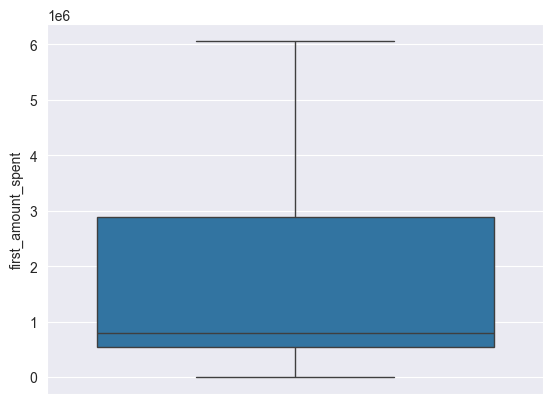

In [9]:
print('Identificazione outliers:')
bp = sns.boxplot(df['first_amount_spent'])

(array([794., 785., 134.,  51., 228., 104., 339.,   8.,   6.,   2.]), array([      0.,  605800., 1211600., 1817400., 2423200., 3029000.,
       3634800., 4240600., 4846400., 5452200., 6058000.]), <BarContainer object of 10 artists>)


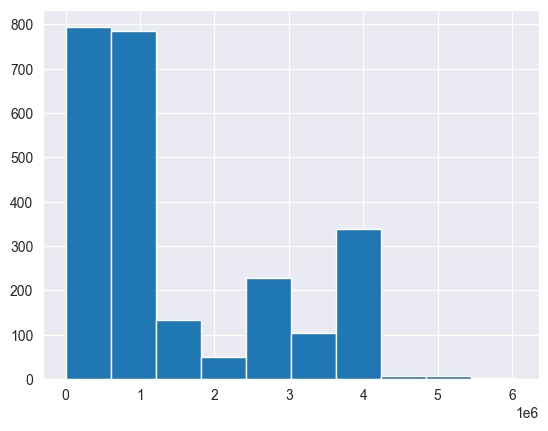

In [10]:
print(plt.hist(df['first_amount_spent']))

Dopo aver verificato che sono presenti valori non validi li eliminiamo

In [11]:
df.drop(df[df['first_amount_spent'] == 0].index, inplace=True)
df['first_amount_spent'].isna().any()

False

Vediamo le caratteristiche della variabile target:

In [12]:
print('Valori variabile target:')
print(df['Y'].unique())
print('Conteggio valori variabile target:')
print(df['Y'].value_counts())

Valori variabile target:
[0 1]
Conteggio valori variabile target:
Y
0    1440
1    1006
Name: count, dtype: int64


Costruiamo la matrice di correlazione affinché possiamo vedere con quali attributi è correlata la variabile target.

La series "Client code" ha alcuni valori non conformi , andiamo ad eliminarli

In [13]:
df['client_code'] = pd.to_numeric(df['client_code'], errors='coerce')
df.drop(df[df['client_code'].isna()].index, inplace=True)

Matrice di correlazione:


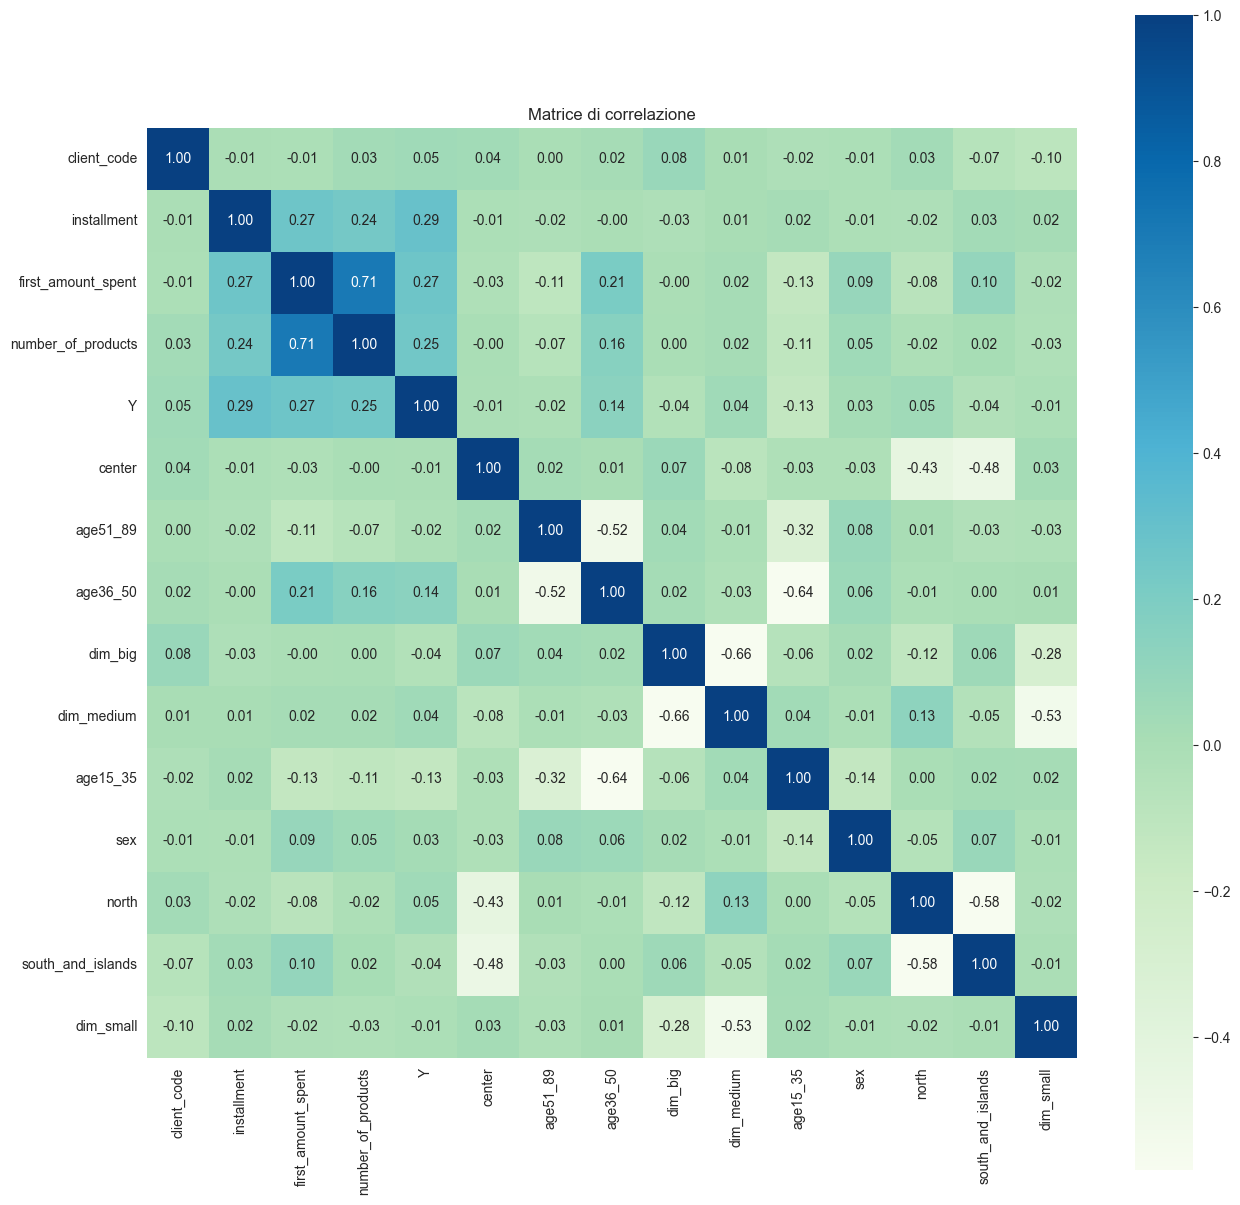

In [14]:
print('Matrice di correlazione:')
corr_matr = df.corr()
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matr, vmax=1, square=True, annot=True, fmt='.2f', cmap='GnBu', robust=True)
plt.title('Matrice di correlazione')
plt.show()

Andiamo a trovare gli attributi maggiormente correlati all'attributo target

In [18]:
def remove_unrelated(df_model, threshold):
    corr = df_model.corr()
    corr_target = abs(corr['Y'])
    relevant_features = corr_target[corr_target > threshold]
    print("Le features maggiormente correlate con valore > di", threshold,"sono:")
    print(relevant_features)
    
    rel_feat = relevant_features.keys().tolist()
    new_df = df_model[rel_feat]
    
    return new_df

remove_unrelated(df, 0.2)

Le features maggiormente correlate con valore > di 0.2 sono:
installment           0.291633
first_amount_spent    0.270346
number_of_products    0.251865
Y                     1.000000
Name: Y, dtype: float64


,installment,first_amount_spent,number_of_products,Y
0,0,520000,0,0
1,1,1484000,2,0
2,0,2459000,1,0
4,1,3823000,2,0
5,1,1391000,2,0
...,...,...,...,...
2326,0,695000,3,0
2327,1,3700000,4,1
2328,1,1970000,4,0
2330,1,3700000,3,0
